# CSCI2244-Assignment 3

## Due Thursday, February 16, at 11:59 PM


### Calista Agmata

## 1.  The birthday party never ends!

### 1.1 Plot birthday probabilities

In class we studied the problem of tossing $k$ balls into $n$ boxes, and computed the probability that all the balls go into different boxes as

$${{n!}\over{(n-k)!}} \cdot n^{-k}.$$

The event that some box contains more than one ball is the complementary event, whose probability is found by subtracting the above number from 1.  We computed this for $n=365$ and $k=63,$ to find the probability that two people in a group of 63 shared a birthday. The result was greater than 0.99, making it a nearly sure bet that we would find a birthday match in your class. In fact, we discovered three matches.

We also found that when $k$ is small in comparison to $n,$ then the probability above is very well approximated by
$$e^{{-(k-1)^2}/{(2n)}}.$$

Plot the probability that $2$ people in a group share a birthday, for $k$ from 1 to 80, using the exact formula. (This should be a line plot, so use the `plot` function.) Then superimpose upon this the plot of the approximation.  The approximation is _very_ good, so if you do this correctly, you should see very little difference between the two plots.  
__Some tips.__

Don't forget that your are plotting the complementary probability.

Do not compute the factorials in the formula above and divide!  Instead, evaluate the numerator as 
$$n\cdot({n-1})\cdot  ({n-2}) \cdots  ({n-k+1}) .$$  Even better, you can evaluate the quotient as
$${{n-1}\over n}\cdot {{n-2}\over n}\cdots{{n-k+1}\over n}.$$
For the approximation, you can use the `exp` function in numpy, and if you are clever about it, you can use parallel operations on numpy arrays to avoid loops.  In fact, you can also do that for the exact probabilities, using a numpy function called `cumprod`, that computes the cumulative product of an array.

You will use this plot again in 1.3 above, where you will add yet another line plot.

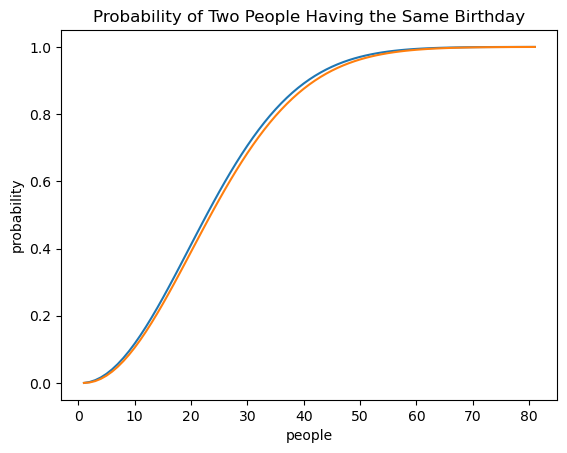

In [2]:
import pylab as pl 
import numpy as np 

def permutation(n,k):
    k_array = np.arange(1,k,1)
    product = 1 
    for i in k_array: 
        numerator = n-i 
        product = product * numerator/n
    complement = 1 - product 
    return complement

def approximation(n,k):
    exponent = -((k-1)**2/(2*n)) 
    aprox = 1 - np.exp(exponent) 
    return aprox 

probability_list = []
approx_list = []
for x in range(1,82):
    probability_list.append(permutation(365,x)) 
    approx_list.append(approximation(365,x)) 
x_axis = pl.arange(1,82)
pl.plot(x_axis, probability_list)
pl.plot(x_axis, approx_list)  
pl.xlabel("people") 
pl.ylabel("probability")
pl.title("Probability of Two People Having the Same Birthday")
pl.show()


### 1.2 Probability of more than one match

In our experiment in a class with 63 people, we found three pairs of matching birthdays. Here you are asked to compute the probability that we get more than one match in such an experiment. Here is a road map:

First compute the number of sequences $(a_1,\ldots,a_k)$ from $\{1,\ldots,365\}$ in which exactly two of the entries are the same. You can approach this in a manner similar to the way we counted poker hands, although remember that we are counting sequences rather than sets.

Now compute the probability of exactly one match with $k=63,$ and use this and earlier results to compute the probability of getting more than one match with $k=63.$

__Your answer here:__ 

$|E|=\frac{364!}{(364-(k-2)!} 365 \binom{k}{2}$  

This is the event because 365 is to choose a day, k choose 2 is choose 2 people out of k people to have that birthday, and $\frac{364!}{(364-(k-2)!}$ is the sum of sequences for choosing the different birthdays of k-2 people.

$P(E)=\frac{\frac{364!}{(364-61)!} 365 \binom{63}{2}}{365^{63}}$ event divided by the sample space for the probability of exactly one match 

The probability of getting more than one match is the probability of getting at least one match minus the probability of getting one match. 

$P(E)=(1-\frac{\frac{365!}{(365-63)!}}{365^{63}})-\frac{\frac{364!}{(364-61)!} 365 \binom{63}{2}}{365^{63}}$


In [9]:
def factorial(n): 
    fact = 1
    while(n > 1):
        fact *= n
        n -= 1
    return fact

In [15]:
no_match = (factorial(365)/factorial(365-63))/365**63
print("probability for no matches:", no_match)
one_match = factorial(364)/factorial(364-61)*365*factorial(63)/(factorial(61)*factorial(2))/365**63
print("probaility for exactly one match:",one_match)
more_than_one_match = (1 - no_match) - one_match
print("probability for more than one match:", more_than_one_match) 

probability for no matches: 0.003395613169052796
probaility for exactly one match: 0.021886575970825446
probability for more than one match: 0.9747178108601218


In [13]:
print("probability of a match in tags:", approximation(365**2,1000)) 

probability of a match in tags: 0.9763772962700745


### 1.3 Births and Deaths

 Marian the Librarian maintains a carefully curated collection of biographical information about prominent people from the 19th century.  She devises the following hashing scheme for indexing her collection:  Every person will be given an 8-digit tag, consisting of the date of their birth (month and day, but not year) and the date of their death.  For example, Nathaniel Hawthorne, born on July 4, 1804 and died on May 19, 1864, would have the ID tag 07040519.

 Marian reasons as follows:  "I have about one thousand people in my collection. There are $365\times 365>100,000$ different tags, which should be distributed roughly uniformly, so the probability of two people with the same tag is something like $1/100.$  So my scheme will most likely give a unique tag for each person."  
 
 What actually _is_ the probability that two people in her collection will get the same tag? How many cells would her hash table need to have so that the probability of a collision is less than 1/100? Again, describe your calculations below, and insert a code cell to show how you computed the required numbers.
 
(Hashing, both for hash tables like the one the librarian is constructing, and for cryptographic hashing, always brings up the question of managing or avoiding collisions, and often leads to a discussion of the birthday problem in courses on data structures and on cryptography.)
  
__Your answer:__

$P(E)=1-\frac{365^2}{(365^2-1000)!}((365^2)^(1000))$ The probability that there will be a match is the probability of 1 minus the probability of there being no matches. Find the probability of there being no matches by calculating n!/(n-k)! n is 365 squared because that is the different types of tags which have two dates and k is 1000 for the number of people being chosen. 

The hash $n=\frac{-1000(1000+1)}{2ln(.99)}$ This is the number of cells using. 

 __Bonus question that has absolutely nothing to do with the course content and for which you will receive no extra credit:__ As you should realize by now, Marian is way off-base.  Just exactly how far off is for you to calculate.  This of course means that her collection probably does have a collision.  Find two prominent 19th century personalities with the same birthday and death day.  (No idea how to do this efficiently---if you know some technically interesting Wikipedia-scraping way to solve the problem, I'd be interested in what it is.)


### 1.4 Real birthdays

As we discussed, our calculation of the probability of a shared birthday in a group of people was based on some idealized assumptions:  First, we treated the problem as one of sampling with replacement, but that is not such a big deal because when we are sampling from such a large group of people, there is very little difference between sampling with replacement and sampling without replacement. (We also make this simplification in the elections problem in part 3.)  Second, there are actually 366 possible birthdays, but one of them (February 29) occurs much less frequently than the others, so much less frequently that this, too, is no big deal.  Third, we assumed that that the distribution of the 365 birthdays is uniform---but are births really uniformly distributed throughout the year?

To help you answer the question, I have posted data on US births in the years 2003, the year that many of you were born.  (This was extracted from files posted on GitHub by FiveThirtyEight.com, who in turn got it from records of the Social Security Administration.  The original data was for the 15 years from 2000 to 2014, but I retained just the rows for 2003. Of course, there is no February 29 issue here!)

This is a '.csv' file, which means that it is actually an ordinary text file, with each line consisting of several fields (4 in this case) separated by commas.  If you double-click on it, it will probably open with Excel, and, indeed, you could do part (a) below just using Excel stuff.  But you will need to open and read the file with Python to do part (b), so I've included in an appendix instructions about how to do this.  The four fields, as you can probably figure out, are the year (always 2003 in this sheet), the month, the day, and the number of births on that date.

(a) Make a scatter plot of the data, showing the proportion of the total number of births for each day of the year.(The scatter plot in this problem functions very much like a stem plot without the stems, just the little dots on top.)

You will be able to see the seasonal nonuniformity very clearly. But there is another source of non-uniformity, which I find absolutely astonishing and somewhat perplexing:  It looks as if there are two or even three entirely separate data series, with roughly the same seasonal variation, but one significantly lower than the other. (This is also apparent if you study the data in spreadsheet form.)

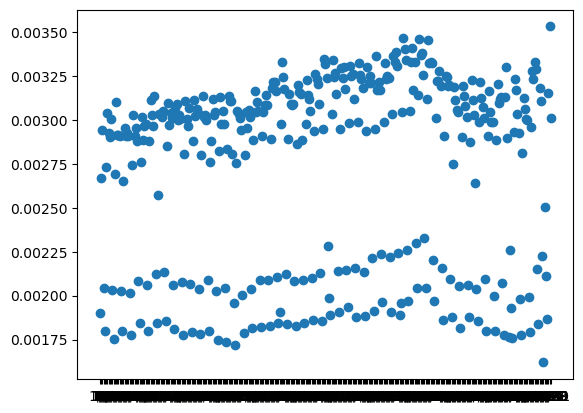

In [4]:
import csv
import pylab as pl 

def get_data():
    combinedlist=[]
    f=open('USbirths2003.csv',newline='')
    reader=csv.reader(f)
    for item in reader:
        combinedlist.append(item)
    return combinedlist

combinedlist = get_data()
date = []
births = []
total_births = 0
births_probability = []
for x in combinedlist: 
    date.append(x[1]+'/'+x[2])
    births.append(int(x[3])) 
    total_births = total_births + int(x[3]) 
for i in births: 
    births_probability.append(i/total_births)

pl.scatter(date,births_probability) 
pl.show()

  
(b) You are to estimate, for $k=1$ to  80, the probability of a coincidental birthday in a group of $k$ people, by performing a simulation based on the probability distribution you computed in (a). You should then superimpose this on the plot that  you made in 1.1 under the assumption of a uniform distribution of 365 days. Do you see much difference between the two plots?  How adequately does the uniform probability distribution model the real-life version of this problem?

__Your comments on the plot here:__

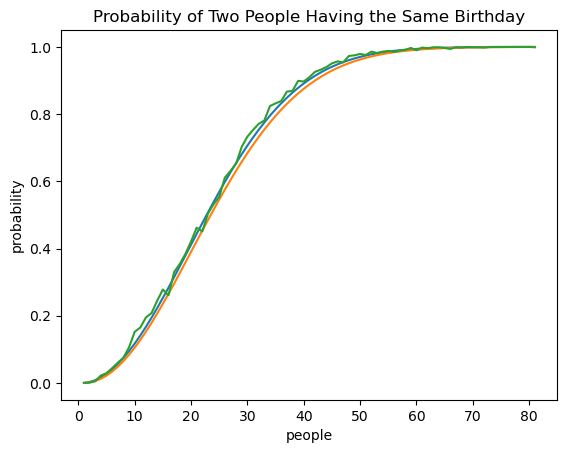

In [6]:
def permutation(n,k):
    k_array = np.arange(1,k,1)
    product = 1 
    for i in k_array: 
        numerator = n-i 
        product = product * numerator/n
    complement = 1 - product 
    return complement

def approximation(n,k):
    exponent = -((k-1)**2/(2*n)) 
    aprox = 1 - np.exp(exponent) 
    return aprox 

probability_list = []
approx_list = []
for x in range(1,82):
    probability_list.append(permutation(365,x)) 
    approx_list.append(approximation(365,x)) 
x_axis = pl.arange(1,82)
pl.plot(x_axis, probability_list)
pl.plot(x_axis, approx_list)  
 

proportion_list = []
for k in range (1,82): 
    repeat_total = 0
    for i in range(1000):
        birthdays = np.random.choice(np.arange(1,366), size=k, p=births_probability)
        unique_birthdays = pl.unique(birthdays)
        if len(birthdays) > len(unique_birthdays): 
            repeat_total +=1
    proportion_list.append(repeat_total/1000) 

pl.plot(x_axis, proportion_list) 
pl.xlabel("people") 
pl.ylabel("probability")
pl.title("Probability of Two People Having the Same Birthday")
pl.show()


__Another bonus question that has nothing to do with the course content and for which you will receive no extra credit.__  Explain the non-uniformities in the distribution of real birthdays.  There are really two questions here:  the reason for the seasonal variation, and the reason for the separate data series.

## 2. Poker, my way

As you saw in class, there is a  Wikipedia page 'Poker probabilities' with probabilities of all the 5-card poker hands, complete with the number of relevant outcomes for each hand expressed in terms of binomial coefficients. Please do take a look at it!  An excellent exercise is to try to find the correct reasoning behind the results they give, and obtain the same answers. In fact, try to solve the problems _before_ looking at the answers.  For really tough ones, you're likely to get it wrong, and an even more excellent exercise is to locate where your count went astray.
  
But I needed to come up with problems whose answers you can't look up on the Web.  So I invented some new poker hands, and here I ask you to determine their probabilities.  This is the version of poker where we draw 5 cards from a shuffled deck.  As in our examples in class, we model this problem with the sample space
$$\{X\subseteq \{1,\ldots,52\}: |X|=5\},$$
and assume each 5-element subset has the same probability.

Explain your reasoning carefully, and  express your answers  both as a formula using binomial coefficients and powers, and as numerical values.  
It's easy to get it wrong, and a very good way to check your answer is to write a simulation.  You are not required to do this for the homework, but it's not a bad idea if you want to see if you were right.

(a) _A  blush._ All 5 cards are red. 

__Your answer:__ $\frac{\binom{26}{5}}{\binom{52}{5}}$ 26 choose 5 because half the deck is red, choose 5 of those cards. Get the probability by dividing by the sample space of choosing any card for the hand of 5. 

(b) _A flash._  All four suits occur.  (This means that exactly one suit will appear twice, which is a clue to solving the problem.) A flash can also be a straight, or a full house, or meet the criteria for some other hand. Don't worry about excluding these; just assume that any hand with all four suits is a flash.  

__Your answer:__ $\frac{\binom{4}{1}\binom{13}{2}\binom{13}{1}\binom{13}{1}\binom{13}{1}}{\binom{52}{5}}$ Do 4 choose 1 to pick the suit for the two cards. Each suit has 13 cards then pick 2 from that suit. Then pick 1 from another suit, from a second suit, and from the last suit. To get the probability divide by the total sequence of possibilities for the five cards. 


(c) _A royal scandal._  The hand contains two Kings, two Queens, and a Jack. 

__Your answer:__ $\frac{\binom{4}{2}\binom{4}{2}\binom{4}{1}}{\binom{52}{5}}$

First choose 2 out of 4 kings, then choose 2 out of 4 queens, lastly choose 1 of 4 jacks. Divide this by all possible outcomes of choosing 5 cards from the 52.
## 3. Election forecasting

There are two candidates in an election, and a very large number of voters (say, several million).  We randomly sample 300 voters and find that Candidate A received the votes of 53%, that is, 159 of them, while Candidate B received 47%, or 141 of these votes votes. Based on this, we predict that Candidate A is the winner.  What is the probability that our prediction is correct?

This problem is not particularly well-posed, and the answer depends on the actual vote.  So let's look at the extreme case, where we are most likely to be wrong.  This occurs when the election is essentially a tie, and Candidate B  wins the election by a single vote.   How likely is it that one candidate receives at least 165 votes in the 300-vote sample?  

HINT:  Strictly speaking, this is sampling without replacement, since we should not poll the same voter twice!  But the voter pool is so large and the sample so small in comparison, that you can treat it as a problem of sampling with replacement, which makes the calculation a lot easier.    You can then think of  the problem as one of flipping 300 fair coins in succession, and finding the probability of getting at least 165 heads.  Describe how you carry out the calculation, along with your conclusion, and provide a code cell that carries out the calculation (you only need one or two lines of code).

__Your answer:__




In [25]:
print("blush",math.comb(26,5)/math.comb(52,5))
print("flash", (math.comb(4,1)*math.comb(13,2)*math.comb(13,1)*math.comb(13,1)*math.comb(13,1))/math.comb(52,5))
print("royal", (math.comb(4,2)*math.comb(4,2)*math.comb(4,1))/math.comb(52,5))

blush 0.025310124049619846
flash 0.2637454981992797
royal 5.5406778095853724e-05


In [18]:
import math 
total=0
for k in range(165,301):
    event_space = math.comb(300,k)
    probability = event_space * (.5)**300
    total = total + probability 
print("probability of getting 165 heads",probability)

probability of getting 165 heads 4.909093465297727e-91


## Implementation Notes

### How do I write $n\choose k$ in LaTeX?

Just double-click on this cell to see how!

### How do I compute binomial coefficients in Python?

Strangely, `numpy` does not seem to provide a function to do this, but standard Python now does, with the `comb` function in the `math` library.  Here is code that prints the first 11 rows of Pascal's triangle.

In [5]:
import math
for row in range(11):
    for column in range(row+1):
        print(math.comb(row,column),end='\t')
    print()

1	
1	1	
1	2	1	
1	3	3	1	
1	4	6	4	1	
1	5	10	10	5	1	
1	6	15	20	15	6	1	
1	7	21	35	35	21	7	1	
1	8	28	56	70	56	28	8	1	
1	9	36	84	126	126	84	36	9	1	
1	10	45	120	210	252	210	120	45	10	1	


### Reading from the .csv file

The following code reads from the .csv file containing the birthday data.  (.csv files are just ordinary text files with each line of text representing a row, and the rows separated by commas.)  The function below returns a list of 365 lists, each consisting of 5 _strings_ and it is up to you to do the type conversion and list rearrangement.

In [31]:
import csv

def get_data():
    combinedlist=[]
    f=open('Births2001.csv',newline='')
    reader=csv.reader(f)
    for item in reader:
        combinedlist.append(item)
    return combinedlist


### Simulating the birthday experiment with the real birthday data

See the posted notes on the `choice` function. Use the optional `p` argument in the `choice` function to select from the 365 birthdays with a nonuniform distribution derived from the data.  How do you check if the list of birthdays that you generate with `choice` contains a repeat? Look at this:

In [1]:
import pylab as pl
d=[2,9,1,3,9]
c=pl.unique(d)
print(c)
print(len(c),len(d))

[1 2 3 9]
4 5


Comparing the lengths of the original array `d` returned by `choice` and the array returned by `pl.unique(d)` will tell you if there was a repeated element.

You will want to sample about 1000 times for each value of $k$ to get an accurate estimate of the probability, so this means about 8000 calls to the `choice` function, which is certainly do-able, but could be a bit time-consuming. You can stop reading now, but...

...there is a clever, although less obvious, way to speed up the simulation: In each trial, repeatedly sample birthdays using the given distribution, until you find a repeat, and record the number of birthdays you sampled.  The proportion of trials that give the result $k$ is approximately 
$$q_k=p_k-p_{k-1},$$
where
$$p_k=P(\text{there is a repeated birthday in a group of } k \text{ people }).$$
Thus the sum 
$$p_k=\sum_{j=2}^kq_j$$
gives the value we're looking for.  So you can just collect the numbers obtained for a large number of trials, compute the _cumulative_ histogram of these, and plot the result as a line chart.  More work for you, but less computation time. 
 